# Packages

In [13]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [14]:
DataType = "Iris"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
# AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)

# Run Time

In [15]:
### Time ###
print("RF Time (minutes): " + "Mean: " + str(round(np.mean(RandomForesResults["Time_RF"])/60,2)) + "| Max: " + str(round(np.max(RandomForesResults["Time_RF"])/60,2)))
print("DUREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))
# print("DUREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)))
# print("UNREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)))

RF Time (minutes): Mean: 0.23| Max: 0.28
DUREAL 0.015 Time (minutes): Mean: 0.04| Max: 0.05
UNREAL 0.015 Time (minutes): Mean: 0.04| Max: 0.05


# Error Vec

(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

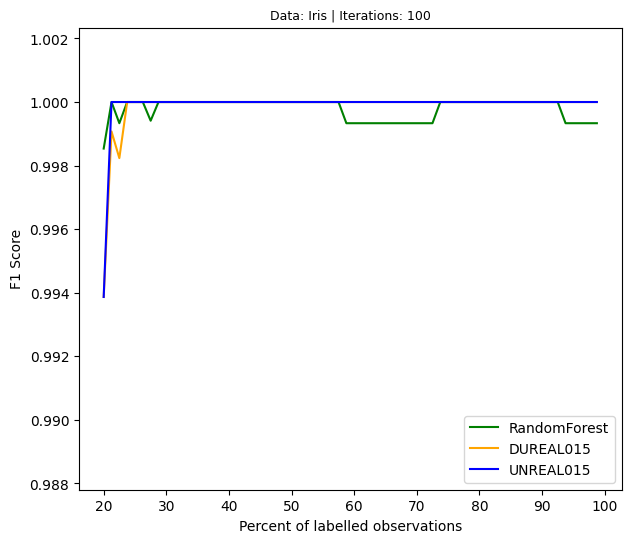

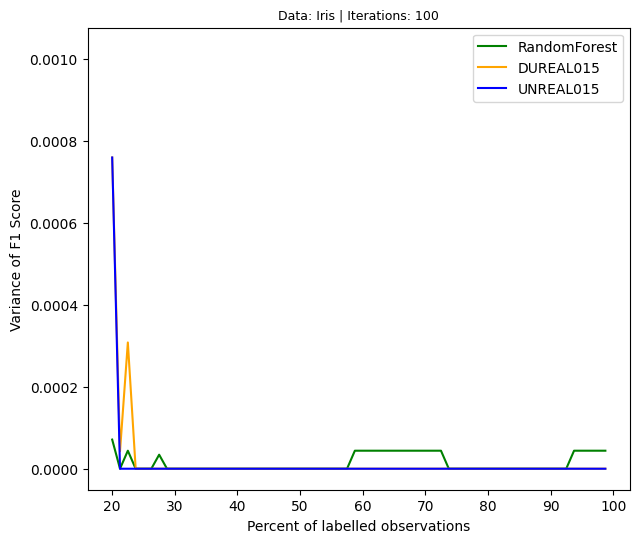

In [16]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL025": "green",
    "UNREAL025": "yellow"
}

# linestyles = {
#     "DUREAL015": "dashed",
#     "UNREAL015": "dashed",
#     "DUREAL025": "solid",
#     "UNREAL025": "solid"
# }

### Figure ##
MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                #  DUREAL025 = AnalyzedData025["Error_DUREAL"],
                #  UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,30],
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 CriticalValue = 1.96)

# Selection History

In [17]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_DUREAL"], DataType = DataType)

In [18]:
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()

,AverageRank,SepalLength_1,SepalLength_2,SepalLength_3,SepalWidth_1,SepalWidth_2,SepalWidth_3,PetalLength_1,PetalLength_2,PetalLength_3,PetalWidth_1,PetalWidth_2,PetalWidth_3,Y
77,1.078125,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
70,2.983871,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
83,3.423729,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
84,4.606061,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
56,5.119403,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [19]:
SelectionHistoryRank_UNREAL15.sort_values(by = "AverageRank").head()

,AverageRank,SepalLength_1,SepalLength_2,SepalLength_3,SepalWidth_1,SepalWidth_2,SepalWidth_3,PetalLength_1,PetalLength_2,PetalLength_3,PetalWidth_1,PetalWidth_2,PetalWidth_3,Y
77,1.515625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
70,3.129032,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
83,3.711864,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
85,18.661538,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
41,19.507692,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [20]:
SelectionHistoryRank_DUREAL15.sort_values(by = "AverageRank").head()

,AverageRank,SepalLength_1,SepalLength_2,SepalLength_3,SepalWidth_1,SepalWidth_2,SepalWidth_3,PetalLength_1,PetalLength_2,PetalLength_3,PetalWidth_1,PetalWidth_2,PetalWidth_3,Y
77,2.265625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
70,2.838710,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
83,3.084746,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
56,16.880597,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
41,20.476923,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


# Tree Counts

In [21]:
UNREAL_Average_TreeCountsRatio = np.mean(AnalyzedData015["TreeCounts_UNREAL"].div(AnalyzedData015["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatio = np.mean(AnalyzedData015["TreeCounts_DUREAL"].div(AnalyzedData015["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatio = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatio, 
                              DUREAL_Average_TreeCountsRatio,
                              np.round(UNREAL_Average_TreeCountsRatio - DUREAL_Average_TreeCountsRatio,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

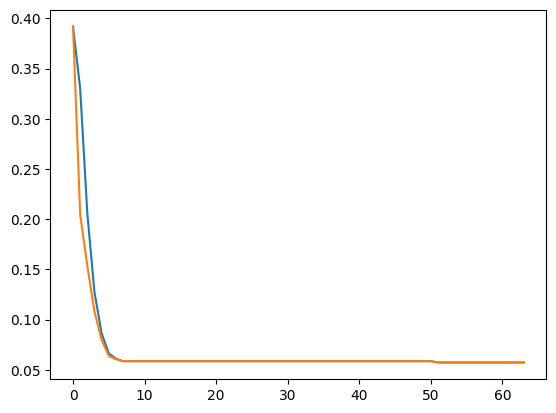

In [22]:
plt.plot(AverageTreeCountRatio["DUREAL"])
plt.plot(AverageTreeCountRatio["UNREAL"])
# plt.plot(AverageTreeCountRatio["Difference"])

In [23]:
AnalyzedData015["TreeCounts_UNREAL"].div(AnalyzedData015["TreeCounts_ALL_UNREAL"])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.555556,0.222222,0.218750,0.178571,0.166667,0.136364,0.111111,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
1,0.592593,0.219512,0.218750,0.178571,0.153846,0.125000,0.100000,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
2,0.388889,0.333333,0.250000,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,...,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462
3,0.666667,0.200000,0.166667,0.150000,0.111111,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
4,0.458333,0.138889,0.142857,0.125000,0.090909,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.187500,0.142857,0.115385,0.090909,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
96,0.178571,0.166667,0.136364,0.100000,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
97,0.416667,0.375000,0.142857,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
98,0.500000,0.166667,0.153846,0.125000,0.100000,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500


In [24]:
AnalyzedData015["TreeCounts_DUREAL"].div(AnalyzedData015["TreeCounts_ALL_DUREAL"])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.500000,0.666667,0.153846,0.136364,0.111111,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
1,0.157895,0.166667,0.115385,0.090909,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
2,0.500000,0.666667,0.153846,0.136364,0.111111,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
3,0.185185,0.235294,0.100000,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
4,0.666667,0.153846,0.136364,0.111111,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.611111,0.583333,0.500000,0.142857,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
96,0.562500,0.142857,0.125000,0.090909,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
97,0.157895,0.142857,0.125000,0.090909,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
98,0.500000,0.666667,0.625000,0.285714,0.111111,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
